In [1]:
from hestonpy.models.heston import Heston
from hestonpy.models.volatilitySmile import VolatilitySmile

import matplotlib.pyplot as plt 
import numpy as np

r = 0.00

# With syntetic market price

In [2]:
spot = 100
time_to_maturity = 1
true_params = {
    "vol_initial": 0.06,
    "kappa": 1.25,
    "theta": 0.06,
    "drift_emm": 0.00,
    "sigma": 0.6,
    "rho": -0.5,
}
vol = np.sqrt(0.04)

heston = Heston(spot=spot, r=r, **true_params)
price_function = heston.call_price

strikes = np.linspace(70, 140, 10) 

### Without noise

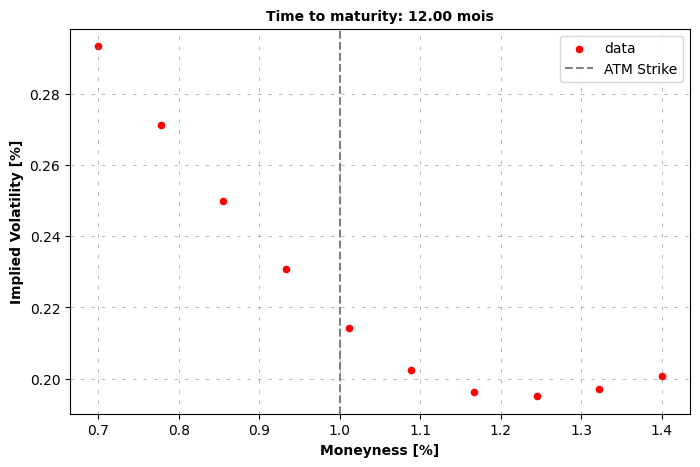

In [3]:
market_prices = price_function(**true_params, strike=strikes, time_to_maturity=time_to_maturity, s=spot)

volSmile = VolatilitySmile(
    strikes=strikes,
    time_to_maturity=time_to_maturity,
    atm=spot,
    market_prices=market_prices,
    r=r
)
volSmile.plot()

Local optimization (might not be global)

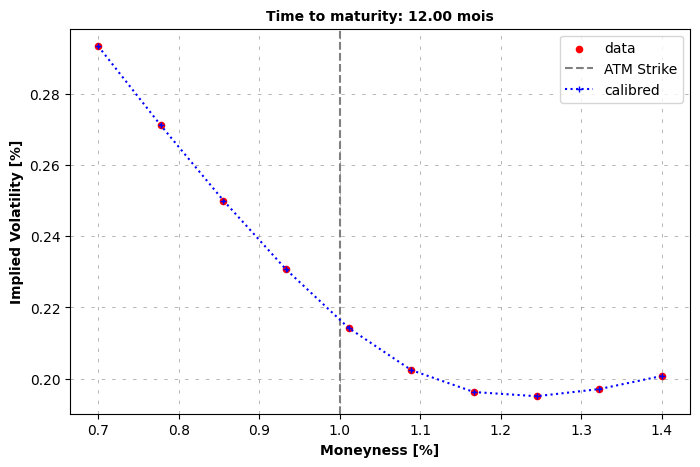

{'vol_initial': np.float64(0.04589513559224998),
 'kappa': np.float64(1.300146471815175),
 'theta': np.float64(0.0783835294523498),
 'drift_emm': 0,
 'sigma': np.float64(0.6481023056905623),
 'rho': np.float64(-0.5031858609015502)}

In [4]:
calibrated_params = volSmile.calibration(
    price_function=price_function,
    guess_correlation_sign='negative',
    speed='local',
)
calibrated_heston = Heston(spot=spot, r=r, **calibrated_params)
volSmile.plot(calibrated_prices=heston.call_price(strike=strikes, time_to_maturity=time_to_maturity))
calibrated_params

In [5]:
true_params

{'vol_initial': 0.06,
 'kappa': 1.25,
 'theta': 0.06,
 'drift_emm': 0.0,
 'sigma': 0.6,
 'rho': -0.5}

Global optimization

Initial Parameters: kappa=1.25 | theta=0.04 | sigma=0.25 | rho=-0.5

at minimum 0.000028 accepted 1
Parameters: kappa=1.300146471815175 | theta=0.0783835294523498 | sigma=0.6481023056905623 | rho=-0.5031858609015502

at minimum 0.002952 accepted 1
Parameters: kappa=0.03625987484229916 | theta=0.7778833037152267 | sigma=0.3926954960164318 | rho=-0.519198210649182

at minimum 0.000002 accepted 1
Parameters: kappa=1.113103890700491 | theta=0.08161636312605423 | sigma=0.607546853397416 | rho=-0.5050159217023357

at minimum 0.002839 accepted 1
Parameters: kappa=0.04950165438335812 | theta=0.5851092142307666 | sigma=0.3951082680461082 | rho=-0.5189791397804464

['success condition satisfied'] True


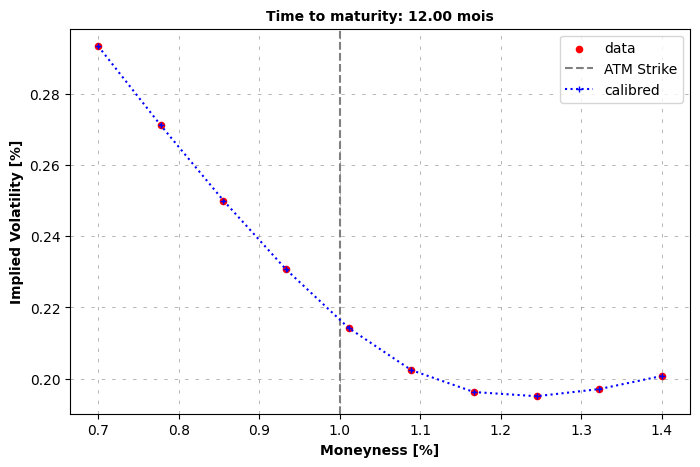

{'vol_initial': np.float64(0.04589513559224998),
 'kappa': np.float64(1.113103890700491),
 'theta': np.float64(0.08161636312605423),
 'drift_emm': 0,
 'sigma': np.float64(0.607546853397416),
 'rho': np.float64(-0.5050159217023357)}

In [6]:
calibrated_params = volSmile.calibration(
    price_function=price_function,
    guess_correlation_sign='negative',
    speed='global',
)
calibrated_heston = Heston(spot=spot, r=r, **calibrated_params)
volSmile.plot(calibrated_prices=heston.call_price(strike=strikes, time_to_maturity=time_to_maturity))
calibrated_params

In [7]:
true_params

{'vol_initial': 0.06,
 'kappa': 1.25,
 'theta': 0.06,
 'drift_emm': 0.0,
 'sigma': 0.6,
 'rho': -0.5}

with noise

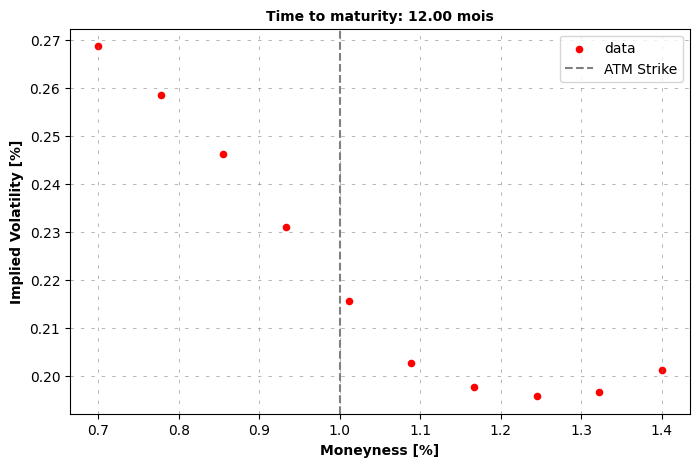

In [8]:
market_prices = market_prices * (1 + np.random.normal(scale=0.01, size=len(market_prices)))  # a little of market noise
volSmile = VolatilitySmile(
    strikes=strikes,
    time_to_maturity=time_to_maturity,
    atm=spot,
    market_prices=market_prices,
    r=r
)
volSmile.plot()

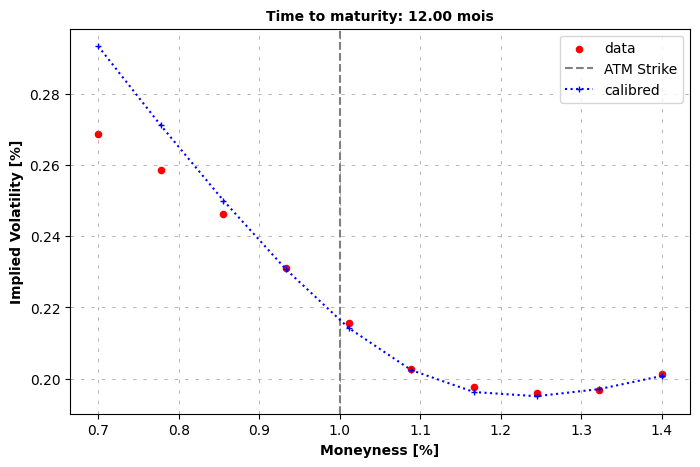

{'vol_initial': np.float64(0.046525411506249996),
 'kappa': np.float64(0.01794932777127927),
 'theta': np.float64(1.0),
 'drift_emm': 0,
 'sigma': np.float64(0.2924834396954787),
 'rho': np.float64(-0.5157190701919346)}

In [9]:
calibrated_params = volSmile.calibration(
    price_function=price_function,
    guess_correlation_sign='negative',
    speed='local',
)
calibrated_heston = Heston(spot=spot, r=r, **calibrated_params)
volSmile.plot(calibrated_prices=heston.call_price(strike=strikes, time_to_maturity=time_to_maturity))
calibrated_params

Initial Parameters: kappa=1.25 | theta=0.04 | sigma=0.25 | rho=-0.5

at minimum 0.031663 accepted 1
Parameters: kappa=0.01794932777127927 | theta=1.0 | sigma=0.2924834396954787 | rho=-0.5157190701919346

at minimum 0.031727 accepted 1
Parameters: kappa=0.0211955884550575 | theta=0.8549567856526168 | sigma=0.2928696761174613 | rho=-0.5156812885684164

at minimum 0.031673 accepted 1
Parameters: kappa=0.018435298901148704 | theta=0.9749462779333535 | sigma=0.2925782430890064 | rho=-0.5155183949058796

['success condition satisfied'] True


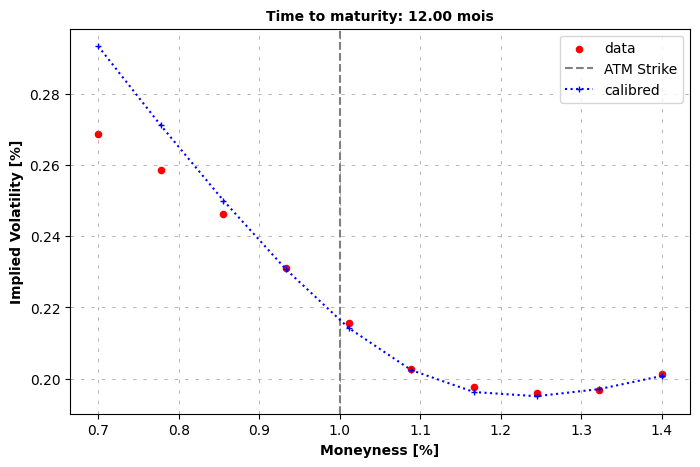

{'vol_initial': np.float64(0.046525411506249996),
 'kappa': np.float64(0.01794932777127927),
 'theta': np.float64(1.0),
 'drift_emm': 0,
 'sigma': np.float64(0.2924834396954787),
 'rho': np.float64(-0.5157190701919346)}

In [10]:
calibrated_params = volSmile.calibration(
    price_function=price_function,
    guess_correlation_sign='negative',
    speed='global',
)
calibrated_heston = Heston(spot=spot, r=r, **calibrated_params)
volSmile.plot(calibrated_prices=heston.call_price(strike=strikes, time_to_maturity=time_to_maturity))
calibrated_params

With SVI

['success condition satisfied'] True


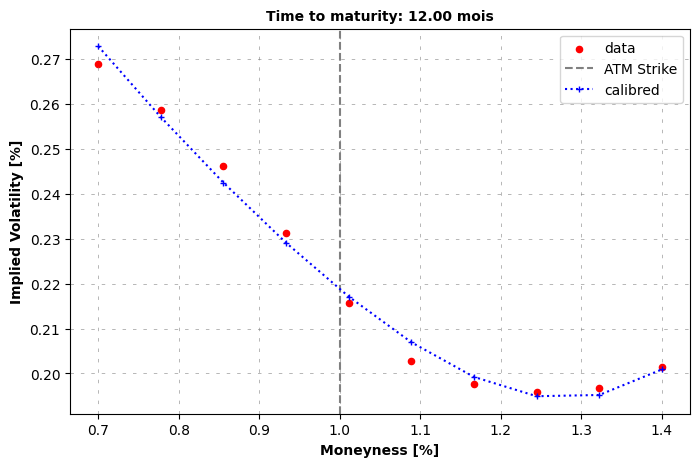

{'a': np.float64(0.005359065307315248),
 'b': np.float64(0.17715813694290009),
 'rho': np.float64(0.5063049481340306),
 'm': np.float64(0.3713400768910729),
 'sigma': np.float64(0.21237535295216728)}

In [11]:
calibrated_params, raw_svi_ivs = volSmile.svi_smooth(select_svi_ivs=False)
volSmile.plot(raw_svi_ivs)
calibrated_params